In [95]:
import re #re-regular expression
import pandas as pd
from datetime import datetime

In [96]:
f=open('WhatsApp Chat with Panel A Unofficial (1).txt','r',encoding='utf-8')

In [97]:
data=f.read()

In [98]:
print(data)

14/01/23, 14:58 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
14/01/23, 14:54 - Aadish D created group "Panel A Unofficial"
14/01/23, 14:58 - Soham Jadhav added you
14/01/23, 14:58 - The message timer was updated. New messages will disappear from this chat 90 days after they're sent, except when kept
14/01/23, 14:58 - Aadish D added Vivan Sankhe
14/01/23, 15:03 - Aadish D added ~SHaSHaNK and Divyam
14/01/23, 15:08 - Soham Jadhav added Chinmay H and +91 72630 24144
14/01/23, 15:12 - Divyam added Gaurav Dave, Harsh, Panda 🐼 and Parth
14/01/23, 15:19 - Divyam added Atharva, Atharva Mahabal, Isha, Rohan Nair, Sudhanshu Kale, +91 90757 97291, +91 93595 57876, +91 94210 52772 and +91 98817 01119
14/01/23, 15:27 - Divyam added Dhl
14/01/23, 15:28 - Aadish D removed Sanraaj Flora
14/01/23, 15:29 - Aadish D added Saloni
14/01/23, 19:09 - You turned off disappearing messages.
14/01/23, 21:30 - Soham J

In [99]:
print(type(data))

<class 'str'>


In [100]:
#pattern = r'\d{1,2}/\d{1,2}/\d{1,2},?\s\d{1,2}:\d{2}\s[APMapm]{2}\s-' 12hours
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s' #d-digit,s-space ,24hours

In [101]:
messages=re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Aadish D created group "Panel A Unofficial"\n',
 'Soham Jadhav added you\n',
 "The message timer was updated. New messages will disappear from this chat 90 days after they're sent, except when kept\n",
 'Aadish D added Vivan Sankhe\n',
 'Aadish D added ~SHaSHaNK and Divyam\n',
 'Soham Jadhav added Chinmay H and +91 72630 24144\n',
 'Divyam added Gaurav Dave, Harsh, Panda 🐼 and Parth\n',
 'Divyam added Atharva, Atharva Mahabal, Isha, Rohan Nair, Sudhanshu Kale, +91 90757 97291, +91 93595 57876, +91 94210 52772 and +91 98817 01119\n',
 'Divyam added Dhl\n',
 'Aadish D removed Sanraaj Flora\n',
 'Aadish D added Saloni\n',
 'You turned off disappearing messages.\n',
 "Soham Jadhav: Don't forward this link to anyone!!\n",
 'Soham Jadhav: https://forms.gle/RjBwpXKywPfDmhft6\n',
 'Soham Jadhav: Enter your official mail id along with your roll numb

In [102]:
dates=re.findall(pattern,data)
dates

['14/01/23, 14:58 - ',
 '14/01/23, 14:54 - ',
 '14/01/23, 14:58 - ',
 '14/01/23, 14:58 - ',
 '14/01/23, 14:58 - ',
 '14/01/23, 15:03 - ',
 '14/01/23, 15:08 - ',
 '14/01/23, 15:12 - ',
 '14/01/23, 15:19 - ',
 '14/01/23, 15:27 - ',
 '14/01/23, 15:28 - ',
 '14/01/23, 15:29 - ',
 '14/01/23, 19:09 - ',
 '14/01/23, 21:30 - ',
 '14/01/23, 21:30 - ',
 '14/01/23, 21:30 - ',
 '14/01/23, 21:31 - ',
 '14/01/23, 21:32 - ',
 '14/01/23, 21:33 - ',
 '14/01/23, 21:39 - ',
 '14/01/23, 21:42 - ',
 '14/01/23, 21:46 - ',
 '14/01/23, 21:47 - ',
 '14/01/23, 21:47 - ',
 '14/01/23, 21:53 - ',
 '14/01/23, 22:00 - ',
 '14/01/23, 22:01 - ',
 '14/01/23, 22:21 - ',
 '14/01/23, 22:45 - ',
 '16/01/23, 09:09 - ',
 '18/01/23, 11:39 - ',
 '18/01/23, 18:30 - ',
 '19/01/23, 11:02 - ',
 '19/01/23, 18:29 - ',
 '19/01/23, 18:29 - ',
 '20/01/23, 09:58 - ',
 '20/01/23, 10:36 - ',
 '20/01/23, 10:37 - ',
 '20/01/23, 10:43 - ',
 '20/01/23, 10:43 - ',
 '20/01/23, 10:48 - ',
 '20/01/23, 10:51 - ',
 '20/01/23, 11:27 - ',
 '20/01/23,

In [103]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})
#convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'],format = "%d/%m/%y, %H:%M - ")
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-01-14 14:58:00
1,"Aadish D created group ""Panel A Unofficial""\n",2023-01-14 14:54:00
2,Soham Jadhav added you\n,2023-01-14 14:58:00
3,The message timer was updated. New messages wi...,2023-01-14 14:58:00
4,Aadish D added Vivan Sankhe\n,2023-01-14 14:58:00


In [104]:
df.shape

(16268, 2)

In [105]:
#separate user and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)
df.head()

,date,user,message
0,2023-01-14 14:58:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-01-14 14:54:00,group_notification,"Aadish D created group ""Panel A Unofficial""\n"
2,2023-01-14 14:58:00,group_notification,Soham Jadhav added you\n
3,2023-01-14 14:58:00,group_notification,The message timer was updated. New messages wi...
4,2023-01-14 14:58:00,group_notification,Aadish D added Vivan Sankhe\n


In [106]:
df

,date,user,message
0,2023-01-14 14:58:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-01-14 14:54:00,group_notification,"Aadish D created group ""Panel A Unofficial""\n"
2,2023-01-14 14:58:00,group_notification,Soham Jadhav added you\n
3,2023-01-14 14:58:00,group_notification,The message timer was updated. New messages wi...
4,2023-01-14 14:58:00,group_notification,Aadish D added Vivan Sankhe\n
...,...,...,...
16263,2024-01-19 14:41:00,Aadish D,Koi gaya hai kya meeting\n
16264,2024-01-19 14:46:00,Soham Jadhav,Teacher hi nahi aayi abhtakh\n
16265,2024-01-19 14:47:00,Soham Jadhav,Aagayi ma'am\n
16266,2024-01-19 16:07:00,Aadish D,Koi gist dedo Bhai\n


In [107]:
#extract the year
df['year']=df['date'].dt.year

In [108]:
df.head()

,date,user,message,year
0,2023-01-14 14:58:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023
1,2023-01-14 14:54:00,group_notification,"Aadish D created group ""Panel A Unofficial""\n",2023
2,2023-01-14 14:58:00,group_notification,Soham Jadhav added you\n,2023
3,2023-01-14 14:58:00,group_notification,The message timer was updated. New messages wi...,2023
4,2023-01-14 14:58:00,group_notification,Aadish D added Vivan Sankhe\n,2023


In [109]:
#extract the month name
df['month']=df['date'].dt.month_name()

In [110]:
df

,date,user,message,year,month
0,2023-01-14 14:58:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,January
1,2023-01-14 14:54:00,group_notification,"Aadish D created group ""Panel A Unofficial""\n",2023,January
2,2023-01-14 14:58:00,group_notification,Soham Jadhav added you\n,2023,January
3,2023-01-14 14:58:00,group_notification,The message timer was updated. New messages wi...,2023,January
4,2023-01-14 14:58:00,group_notification,Aadish D added Vivan Sankhe\n,2023,January
...,...,...,...,...,...
16263,2024-01-19 14:41:00,Aadish D,Koi gaya hai kya meeting\n,2024,January
16264,2024-01-19 14:46:00,Soham Jadhav,Teacher hi nahi aayi abhtakh\n,2024,January
16265,2024-01-19 14:47:00,Soham Jadhav,Aagayi ma'am\n,2024,January
16266,2024-01-19 16:07:00,Aadish D,Koi gist dedo Bhai\n,2024,January


In [111]:
#extract the day of month
df['day']=df['date'].dt.day

In [112]:
df.head()

,date,user,message,year,month,day
0,2023-01-14 14:58:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,January,14
1,2023-01-14 14:54:00,group_notification,"Aadish D created group ""Panel A Unofficial""\n",2023,January,14
2,2023-01-14 14:58:00,group_notification,Soham Jadhav added you\n,2023,January,14
3,2023-01-14 14:58:00,group_notification,The message timer was updated. New messages wi...,2023,January,14
4,2023-01-14 14:58:00,group_notification,Aadish D added Vivan Sankhe\n,2023,January,14


In [113]:
#extract the hour and min
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

In [114]:
df

,date,user,message,year,month,day,hour,minute
0,2023-01-14 14:58:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,January,14,14,58
1,2023-01-14 14:54:00,group_notification,"Aadish D created group ""Panel A Unofficial""\n",2023,January,14,14,54
2,2023-01-14 14:58:00,group_notification,Soham Jadhav added you\n,2023,January,14,14,58
3,2023-01-14 14:58:00,group_notification,The message timer was updated. New messages wi...,2023,January,14,14,58
4,2023-01-14 14:58:00,group_notification,Aadish D added Vivan Sankhe\n,2023,January,14,14,58
...,...,...,...,...,...,...,...,...
16263,2024-01-19 14:41:00,Aadish D,Koi gaya hai kya meeting\n,2024,January,19,14,41
16264,2024-01-19 14:46:00,Soham Jadhav,Teacher hi nahi aayi abhtakh\n,2024,January,19,14,46
16265,2024-01-19 14:47:00,Soham Jadhav,Aagayi ma'am\n,2024,January,19,14,47
16266,2024-01-19 16:07:00,Aadish D,Koi gist dedo Bhai\n,2024,January,19,16,7


In [115]:
df[df['message']=='<Media Omitted>\n']

,date,user,message,year,month,day,hour,minute


In [116]:
from urlextract import URLExtract
extractor=URLExtract()
urls=extractor.find_urls("Let's www.gmail.com have URL stackoverflow.com as an example")
urls

['www.gmail.com', 'stackoverflow.com']

In [117]:
y=[]
for message in df['message']:
    y.extend(extractor.find_urls(message))


In [118]:
len(y)

166

In [119]:
df

,date,user,message,year,month,day,hour,minute
0,2023-01-14 14:58:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,January,14,14,58
1,2023-01-14 14:54:00,group_notification,"Aadish D created group ""Panel A Unofficial""\n",2023,January,14,14,54
2,2023-01-14 14:58:00,group_notification,Soham Jadhav added you\n,2023,January,14,14,58
3,2023-01-14 14:58:00,group_notification,The message timer was updated. New messages wi...,2023,January,14,14,58
4,2023-01-14 14:58:00,group_notification,Aadish D added Vivan Sankhe\n,2023,January,14,14,58
...,...,...,...,...,...,...,...,...
16263,2024-01-19 14:41:00,Aadish D,Koi gaya hai kya meeting\n,2024,January,19,14,41
16264,2024-01-19 14:46:00,Soham Jadhav,Teacher hi nahi aayi abhtakh\n,2024,January,19,14,46
16265,2024-01-19 14:47:00,Soham Jadhav,Aagayi ma'am\n,2024,January,19,14,47
16266,2024-01-19 16:07:00,Aadish D,Koi gist dedo Bhai\n,2024,January,19,16,7


In [120]:
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [121]:
links

['https://forms.gle/RjBwpXKywPfDmhft6',
 'https://docs.google.com/spreadsheets/d/1SD3ElY26Pz42ChhBNiDieolWosiEl4i-IDTtOnVSMoY/edit?usp=sharing',
 'https://classroom.google.com/c/NTEyNDY1NzMzMTA2?cjc=4752dkh',
 'www.eduyouthmeet.in',
 'http://www.eduyouthmeet.in/',
 'https://chat.whatsapp.com/CXhA8JWFlGR6xN9Ty4KKtG',
 'https://chat.whatsapp.com/H4QiibxumXUFcw3tbMeUkA',
 'https://forms.gle/edhSKna55PGuNiTY9',
 'www.eduyouthmeet.in',
 'https://docs.google.com/forms/d/e/1FAIpQLSc0LJ8UefMM4_d0TWnfH5JRM4UllEp9mVSvn3B6Hd8cV9V-2w/viewform?usp=sf_link',
 'https://instagram.com/hackmitwpu?igshid=MDM4ZDc5MmU=',
 'https://classroom.google.com/c/NTg4NjE1ODcyOTk2?cjc=h5zh726',
 'https://docs.google.com/forms/d/1nk-Zl649axN6WUuaeF3ujYKPfA5ZjYaI8lASlNN4RQs/edit?chromeless=1#responses',
 'group.talk',
 'https://forms.gle/pC3jnk6UjdK9VVQy7',
 'https://docs.google.com/spreadsheets/d/1SD3ElY26Pz42ChhBNiDieolWosiEl4i-IDTtOnVSMoY/edit?usp=drivesdk',
 'https://classroom.google.com/c/NTg4NjE1ODcyOTk2?cjc=h5zh

In [122]:
x=df['user'].value_counts()

In [123]:
import matplotlib.pyplot as plt

In [124]:
name=x.index 
count=x.values

c:\Users\Dhairya Hindoriya\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128060 (\N{PANDA FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


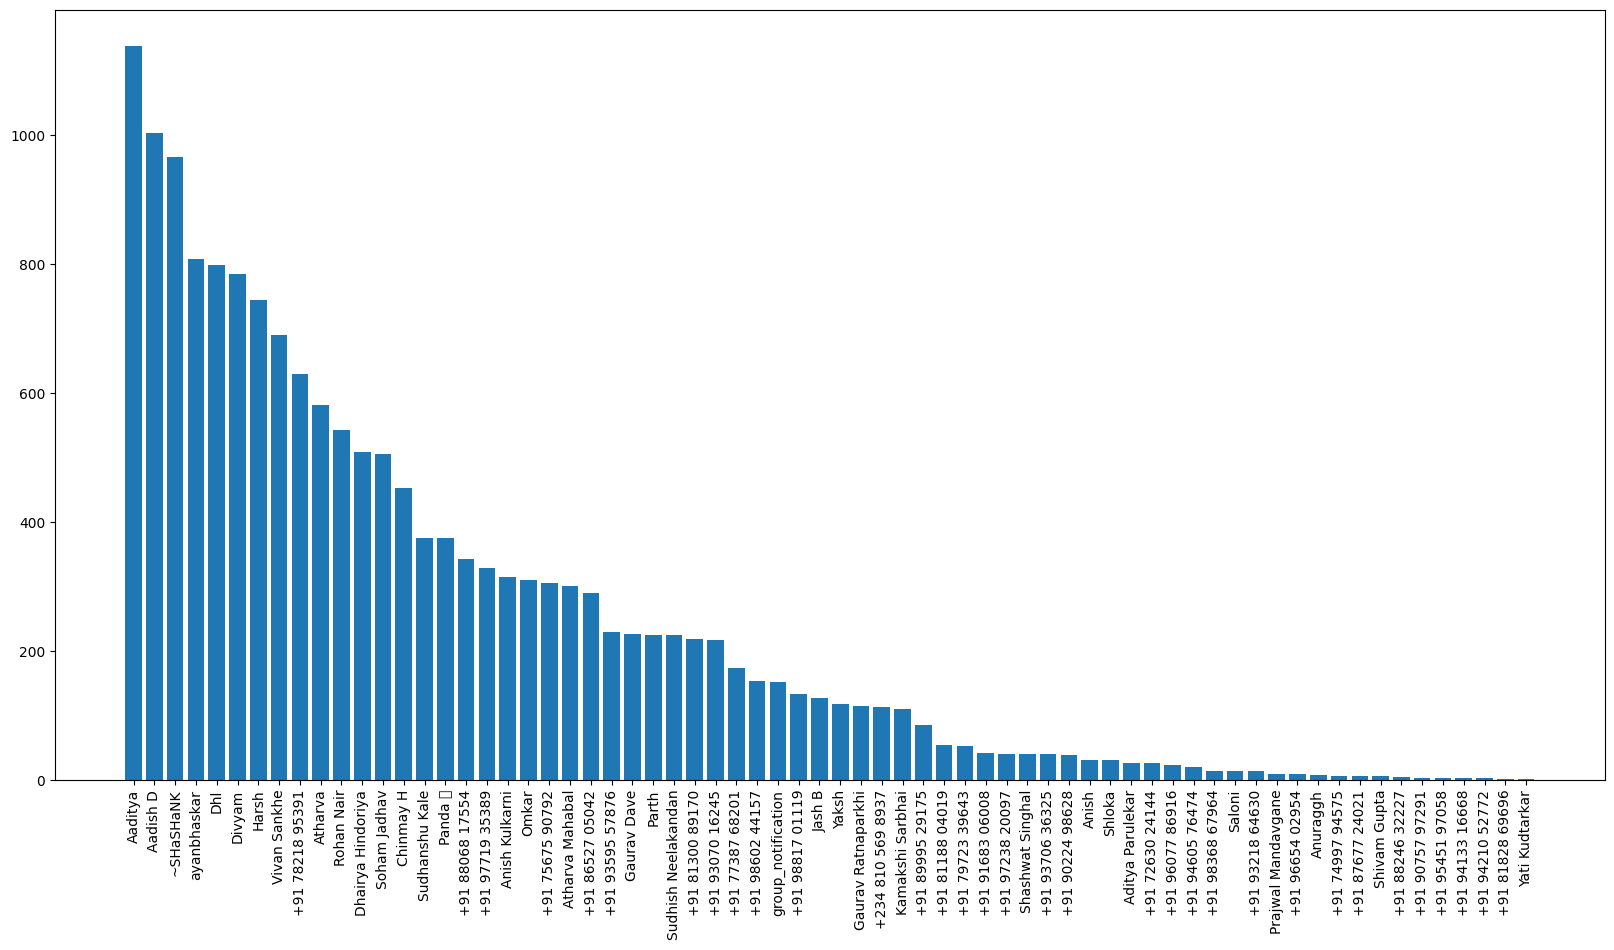

In [125]:
plt.figure(figsize=(20,10))
plt.bar(name,count)
plt.xticks(rotation=90)
plt.show()

In [126]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={"index":"name","user":"percent"})

,percent,count
0,Aaditya,7.00
1,Aadish D,6.17
2,~SHaSHaNK,5.94
3,ayanbhaskar,4.97
4,Dhl,4.91
...,...,...
63,+91 95451 97058,0.01
64,+91 94133 16668,0.01
65,+91 94210 52772,0.01
66,+91 81828 69696,0.01


In [127]:
words=[]
for message in df['message']:
    words.extend(word for word in message.split())
from collections import Counter     
pd.DataFrame(Counter(words).most_common(50))    

,0,1
0,<Media,1981
1,omitted>,1981
2,hai,1854
3,to,745
4,ka,609
5,the,553
6,bhi,509
7,toh,464
8,message,445
9,ke,445


In [128]:
#remove group notification and Media Omitted
temp=df[df['user']!='group_notification']

In [129]:
temp=temp[temp['message']!='<Media Omitted>\n']

In [130]:
temp

,date,user,message,year,month,day,hour,minute
13,2023-01-14 21:30:00,Soham Jadhav,Don't forward this link to anyone!!\n,2023,January,14,21,30
14,2023-01-14 21:30:00,Soham Jadhav,https://forms.gle/RjBwpXKywPfDmhft6\n,2023,January,14,21,30
15,2023-01-14 21:30:00,Soham Jadhav,Enter your official mail id along with your ro...,2023,January,14,21,30
16,2023-01-14 21:31:00,Soham Jadhav,Fill it asap!\n,2023,January,14,21,31
19,2023-01-14 21:39:00,+91 97238 20097,What is this for ?\n,2023,January,14,21,39
...,...,...,...,...,...,...,...,...
16262,2024-01-19 14:22:00,+91 93070 16245,Attendance 19th jan \nDhyey ladani. 52\nDurges...,2024,January,19,14,22
16263,2024-01-19 14:41:00,Aadish D,Koi gaya hai kya meeting\n,2024,January,19,14,41
16264,2024-01-19 14:46:00,Soham Jadhav,Teacher hi nahi aayi abhtakh\n,2024,January,19,14,46
16265,2024-01-19 14:47:00,Soham Jadhav,Aagayi ma'am\n,2024,January,19,14,47


In [131]:
!pip install emoji==1.7.0


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
import emoji

In [133]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [134]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,784
1,💀,413
2,🤣,287
3,🥲,150
4,😭,144
...,...,...
218,🚶,1
219,🛌,1
220,🏕,1
221,🤫,1


In [135]:
df['month_num']=df['date'].dt.month


In [136]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [137]:
timeline

,year,month_num,month,message
0,2023,1,January,258
1,2023,2,February,1321
2,2023,3,March,1924
3,2023,4,April,2157
4,2023,5,May,3618
5,2023,6,June,196
6,2023,7,July,521
7,2023,8,August,1826
8,2023,9,September,1185
9,2023,10,October,759


In [138]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+""+str(timeline['year'][i]))

In [139]:
timeline['time']=time

In [140]:
timeline

,year,month_num,month,message,time
0,2023,1,January,258,January2023
1,2023,2,February,1321,February2023
2,2023,3,March,1924,March2023
3,2023,4,April,2157,April2023
4,2023,5,May,3618,May2023
5,2023,6,June,196,June2023
6,2023,7,July,521,July2023
7,2023,8,August,1826,August2023
8,2023,9,September,1185,September2023
9,2023,10,October,759,October2023


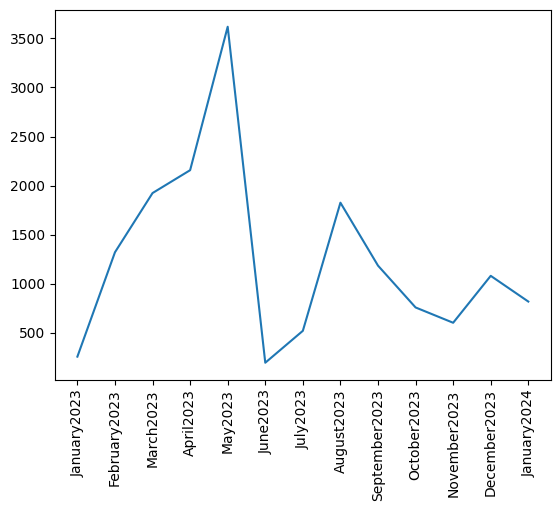

In [141]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation=90)
plt.show()

In [142]:
df['only_date']=df['date'].dt.date

In [143]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

In [144]:
daily_timeline

,only_date,message
0,2023-01-14,29
1,2023-01-16,1
2,2023-01-18,2
3,2023-01-19,3
4,2023-01-20,34
...,...,...
317,2024-01-15,87
318,2024-01-16,24
319,2024-01-17,16
320,2024-01-18,28


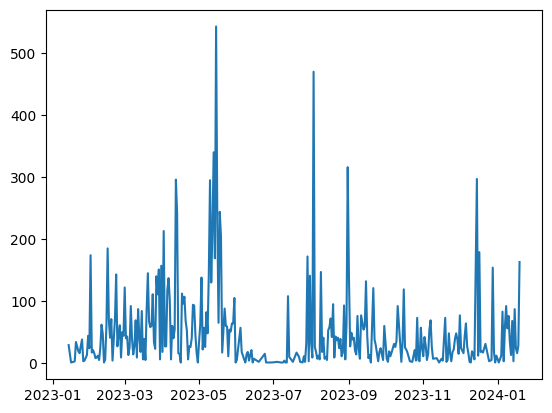

In [145]:
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [146]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2023-01-14 14:58:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,January,14,14,58,1,2023-01-14
1,2023-01-14 14:54:00,group_notification,"Aadish D created group ""Panel A Unofficial""\n",2023,January,14,14,54,1,2023-01-14
2,2023-01-14 14:58:00,group_notification,Soham Jadhav added you\n,2023,January,14,14,58,1,2023-01-14
3,2023-01-14 14:58:00,group_notification,The message timer was updated. New messages wi...,2023,January,14,14,58,1,2023-01-14
4,2023-01-14 14:58:00,group_notification,Aadish D added Vivan Sankhe\n,2023,January,14,14,58,1,2023-01-14
...,...,...,...,...,...,...,...,...,...,...
16263,2024-01-19 14:41:00,Aadish D,Koi gaya hai kya meeting\n,2024,January,19,14,41,1,2024-01-19
16264,2024-01-19 14:46:00,Soham Jadhav,Teacher hi nahi aayi abhtakh\n,2024,January,19,14,46,1,2024-01-19
16265,2024-01-19 14:47:00,Soham Jadhav,Aagayi ma'am\n,2024,January,19,14,47,1,2024-01-19
16266,2024-01-19 16:07:00,Aadish D,Koi gist dedo Bhai\n,2024,January,19,16,7,1,2024-01-19


In [148]:
df['day_name']=df['date'].dt.day_name()

In [153]:
df['day_name'].value_counts().reset_index()

,day_name,count
0,Wednesday,3107
1,Thursday,2903
2,Friday,2825
3,Monday,2568
4,Tuesday,1904
5,Sunday,1507
6,Saturday,1454


In [154]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2023-01-14 14:58:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,January,14,14,58,1,2023-01-14,Saturday
1,2023-01-14 14:54:00,group_notification,"Aadish D created group ""Panel A Unofficial""\n",2023,January,14,14,54,1,2023-01-14,Saturday
2,2023-01-14 14:58:00,group_notification,Soham Jadhav added you\n,2023,January,14,14,58,1,2023-01-14,Saturday
3,2023-01-14 14:58:00,group_notification,The message timer was updated. New messages wi...,2023,January,14,14,58,1,2023-01-14,Saturday
4,2023-01-14 14:58:00,group_notification,Aadish D added Vivan Sankhe\n,2023,January,14,14,58,1,2023-01-14,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
16263,2024-01-19 14:41:00,Aadish D,Koi gaya hai kya meeting\n,2024,January,19,14,41,1,2024-01-19,Friday
16264,2024-01-19 14:46:00,Soham Jadhav,Teacher hi nahi aayi abhtakh\n,2024,January,19,14,46,1,2024-01-19,Friday
16265,2024-01-19 14:47:00,Soham Jadhav,Aagayi ma'am\n,2024,January,19,14,47,1,2024-01-19,Friday
16266,2024-01-19 16:07:00,Aadish D,Koi gist dedo Bhai\n,2024,January,19,16,7,1,2024-01-19,Friday


In [155]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour)+'-'+str('00'))
    elif hour==0:
        period.append(str('00')+'-'+str(hour+1))
    else:
        period.append(str(hour)+'-'+str(hour+1))
            

In [156]:
df['period']=period

In [158]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
13054,2023-10-06 09:46:00,ayanbhaskar,Bsc cs ka bhi 50 ka hei\n,2023,October,6,9,46,10,2023-10-06,Friday,9-10
8015,2023-05-16 03:29:00,Harsh,null\n,2023,May,16,3,29,5,2023-05-16,Tuesday,3-4
3173,2023-03-28 23:27:00,+91 81300 89170,<Media omitted>\n,2023,March,28,23,27,3,2023-03-28,Tuesday,23-00
14515,2023-12-05 13:55:00,Aadish D,Backlog to backlog back to back\n,2023,December,5,13,55,12,2023-12-05,Tuesday,13-14
14204,2023-11-25 21:23:00,Harsh,ya written bhi kuh hai?\n,2023,November,25,21,23,11,2023-11-25,Saturday,21-22


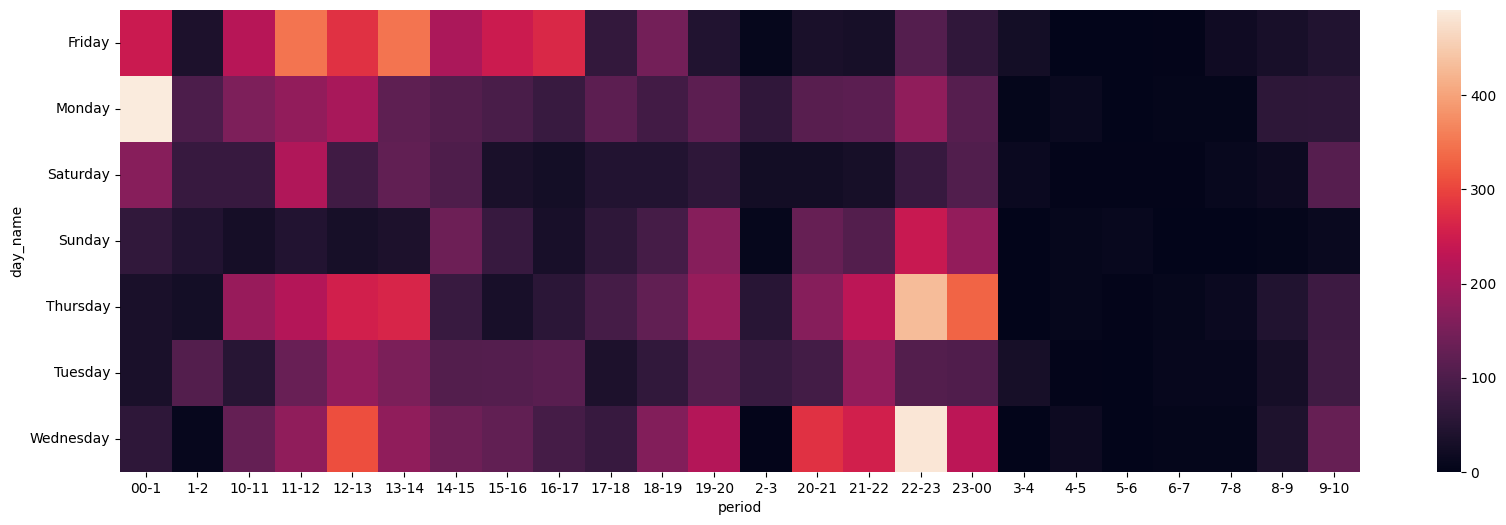

In [159]:
import seaborn as sns 
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation=0)
plt.show()

In [162]:
df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0)


period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,245.0,38.0,222.0,348.0,279.0,348.0,209.0,247.0,267.0,67.0,...,30.0,109.0,63.0,26.0,0.0,0.0,3.0,21.0,32.0,43.0
Monday,491.0,98.0,156.0,180.0,205.0,120.0,106.0,94.0,73.0,118.0,...,116.0,177.0,111.0,4.0,13.0,1.0,5.0,4.0,59.0,60.0
Saturday,167.0,72.0,71.0,214.0,83.0,124.0,101.0,34.0,25.0,46.0,...,29.0,72.0,105.0,14.0,2.0,2.0,3.0,10.0,17.0,110.0
Sunday,64.0,46.0,28.0,45.0,30.0,38.0,138.0,71.0,31.0,61.0,...,107.0,243.0,181.0,0.0,6.0,10.0,0.0,0.0,5.0,12.0
Thursday,34.0,26.0,187.0,218.0,254.0,263.0,74.0,32.0,57.0,89.0,...,227.0,431.0,330.0,1.0,7.0,3.0,6.0,14.0,43.0,79.0
Tuesday,33.0,106.0,50.0,131.0,182.0,155.0,106.0,108.0,114.0,37.0,...,182.0,107.0,102.0,29.0,2.0,1.0,9.0,9.0,27.0,81.0
Wednesday,61.0,8.0,128.0,177.0,309.0,178.0,137.0,124.0,90.0,72.0,...,254.0,485.0,227.0,0.0,16.0,0.0,4.0,5.0,40.0,130.0
